## **AIM: To Study the effect of various factors on students reading, writing and maths score**

I hope you find this kernel helpful and some<font color="red"><b> UPVOTES</b></font>  would be very much appreciated



In [1]:
import warnings                       # to hide warnings if any
warnings.filterwarnings('ignore')




### ** Importing Required Libraries**

In [2]:
import pandas as pd                #Data Processing
import numpy as np                 # Linear Algebra
import matplotlib.pyplot as plt    # Data Visualization
import seaborn as sns              # Data Visualization

%matplotlib inline

### **Reading the data**

In [3]:
df = pd.read_csv('StudentsPerformance.csv')
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [23]:
df.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
530,female,group C,associate's degree,standard,completed,68,67,73
110,female,group D,associate's degree,free/reduced,completed,77,89,98
185,male,group C,associate's degree,free/reduced,completed,65,67,65
66,male,group D,some high school,free/reduced,none,45,37,37
463,female,group C,some college,free/reduced,none,77,90,91
635,male,group A,high school,standard,none,71,74,64
773,female,group C,bachelor's degree,free/reduced,none,62,78,79
843,male,group B,some college,free/reduced,completed,74,77,76
172,female,group D,some college,standard,none,79,86,81
876,male,group D,some college,standard,none,81,82,84


### **Dataset Summary**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### **Checking the number of Null Values**

In [27]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**There are no Null values in any of the columns**

In [28]:
df.shape

(1000, 8)

In [29]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**The features described in the above data set are:**

**1. Count** tells us the number of NoN-empty rows in a feature.

**2. Mean** tells us the mean value of that feature.

**3. Std** tells us the Standard Deviation Value of that feature.

**4. Min** tells us the minimum value of that feature.

**5. 25%**, **50%**, and **75%** are the percentile/quartile of each features.

**6. Max** tells us the maximum value of that feature.

### **Checking each columns features**

#### **1. Gender**

In [30]:
lst=df['gender'].unique()
lst

array(['female', 'male'], dtype=object)

In [31]:
count  = 0
for i in lst:
    count = count + 1
    print(count,'. ',i)

1 .  female
2 .  male


#### **2. Race/Ehtnicity of People**

In [32]:
count = 0
for i in sorted(df['race/ethnicity'].unique()):
    count = count + 1
    print(count, '. ',i)
print('Number of different races/ethnicity of people: ', df['race/ethnicity'].nunique())

1 .  group A
2 .  group B
3 .  group C
4 .  group D
5 .  group E
Number of different races/ethnicity of people:  5


#### **3. Parent's level of Education**

In [33]:
count = 0
for i in df['parental level of education'].unique():
    count = count + 1
    print(count, '. ', i)

1 .  bachelor's degree
2 .  some college
3 .  master's degree
4 .  associate's degree
5 .  high school
6 .  some high school


#### **4. Different types of lunches**

In [34]:
count  = 0
for i in df['lunch'].unique():
    count = count + 1
    print(count,'. ',i)

1 .  standard
2 .  free/reduced


#### **5. Types of Test Prepration Course**


In [35]:
count  = 0
for i in df['test preparation course'].unique():
    count = count + 1
    print(count,'.',i)

1 . none
2 . completed


## **Exploratory Data Analysis**


In [41]:
sns.set_style('darkgrid')

#### **1. Pairplot**

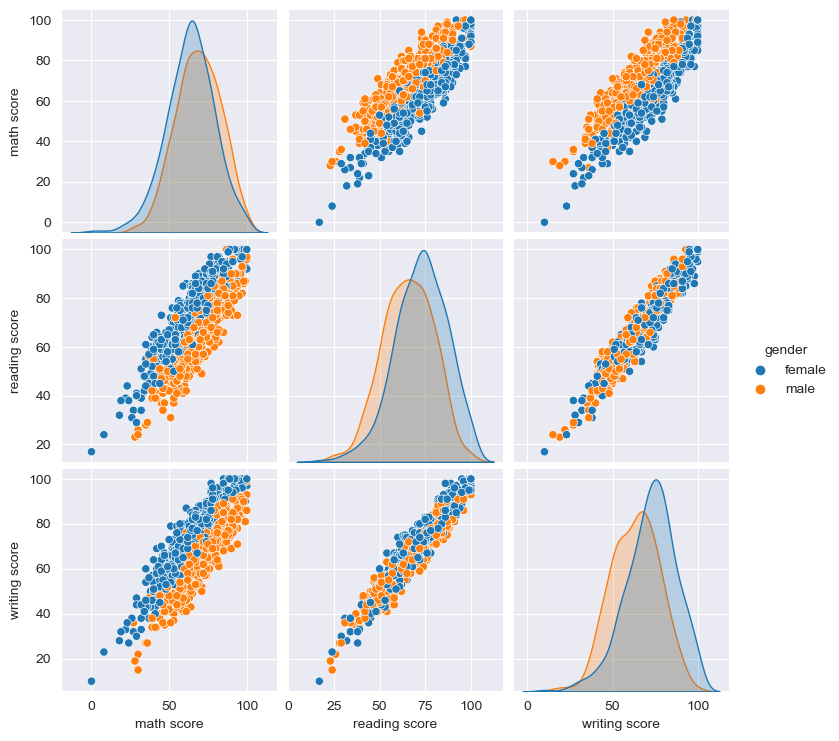

In [42]:
sns.pairplot(df, hue = 'gender')
plt.show()

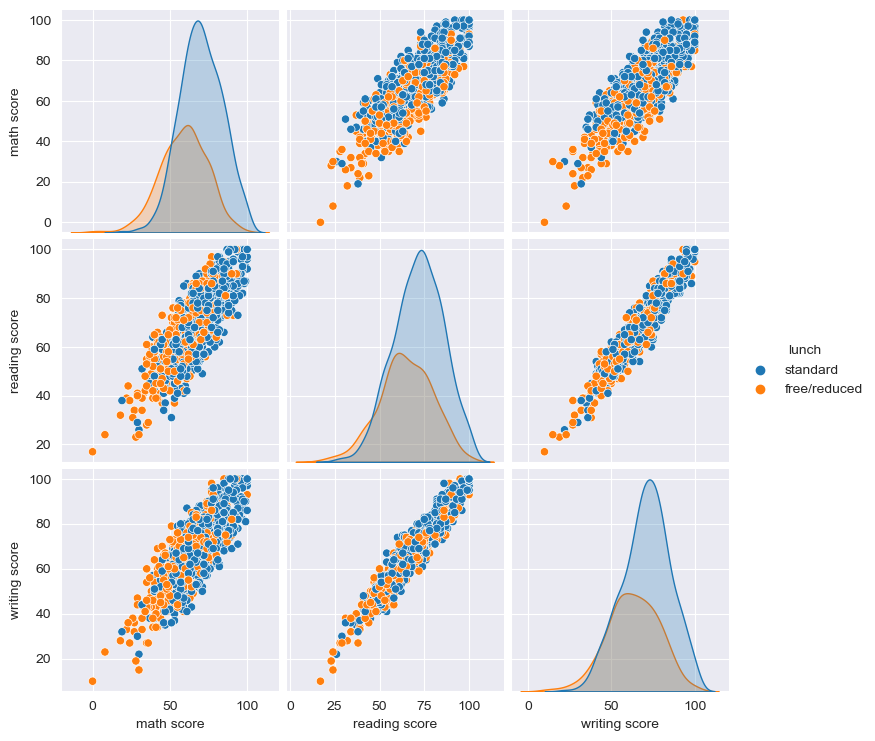

In [38]:
sns.pairplot(df, hue = 'lunch')
plt.show()

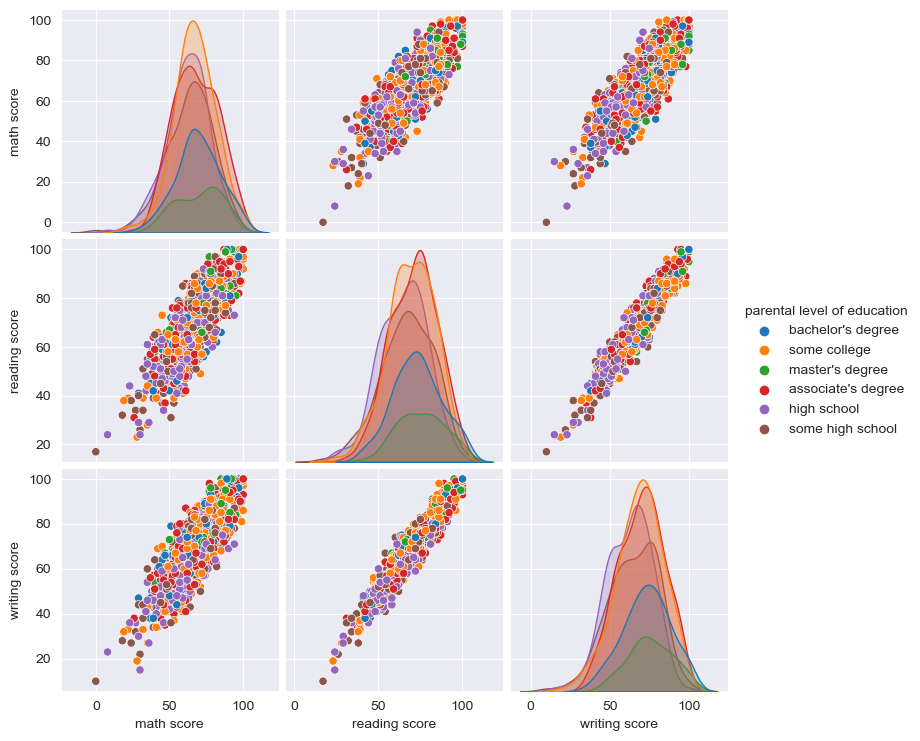

In [40]:
sns.pairplot(df, hue = 'parental level of education')
plt.show()

#### **2. Heatmap**

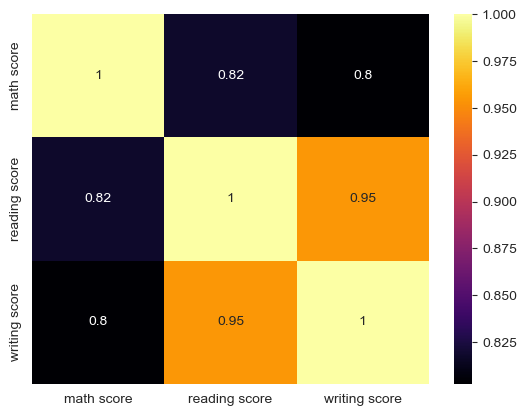

In [43]:
sns.heatmap(df.corr(), annot = True, cmap='inferno')
plt.show()

**There is strong correlation between a student's reading score & writing score, reading score & math score and writing score & math score**

### **Plotting the distribution of students marks**

#### **1. Math Score**

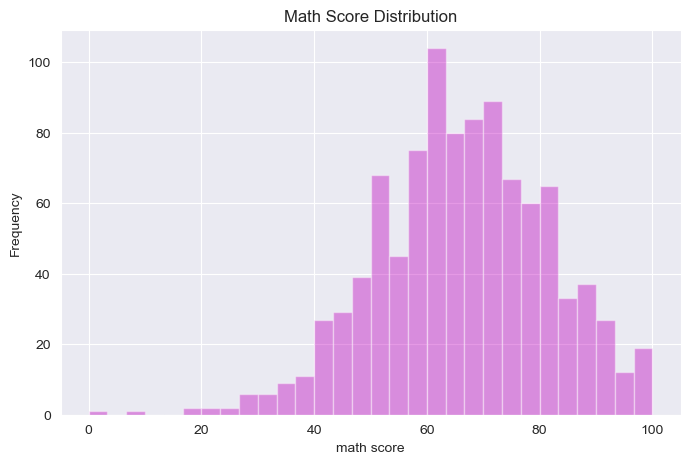

In [44]:
plt.figure(figsize=(8,5))
sns.distplot(df['math score'], kde = False, color='m', bins = 30)
plt.ylabel('Frequency')
plt.title('Math Score Distribution')
plt.show()

**Most students have their math score in the range of 60 to 80**

#### **2. Reading Score**

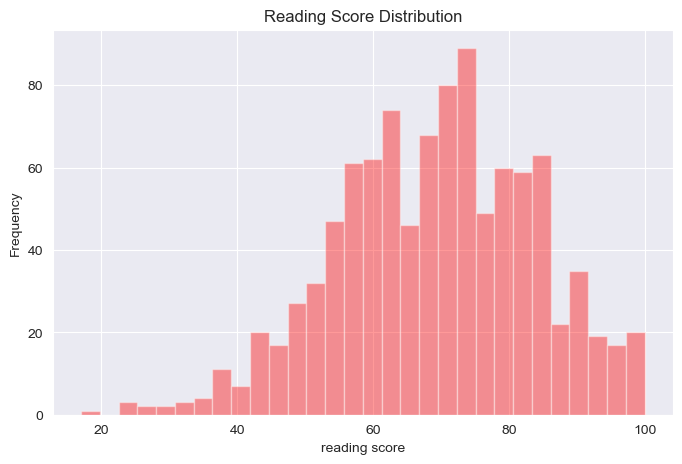

In [45]:
plt.figure(figsize=(8,5))
sns.distplot(df['reading score'], kde = False, color='r', bins = 30)
plt.ylabel('Frequency')
plt.title('Reading Score Distribution')
plt.show()

**Most students have their reading score in the range of 60 to 80**

#### ** 3. Writing Score**

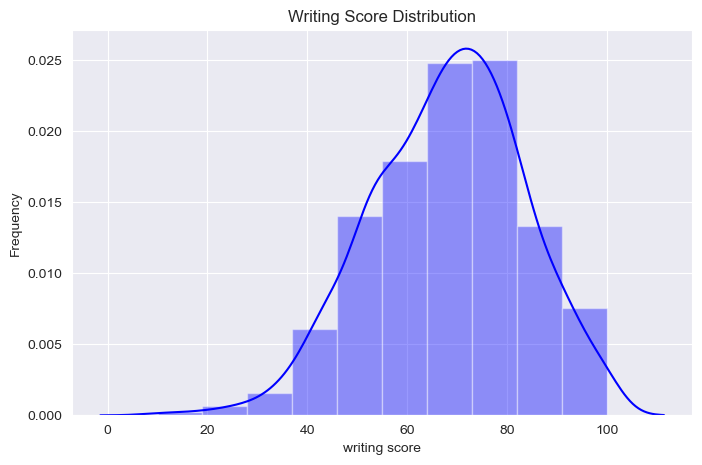

In [48]:
plt.figure(figsize=(8,5))
sns.distplot(df['writing score'], kde = True, color='blue', bins = 10)
plt.ylabel('Frequency')
plt.title('Writing Score Distribution')
plt.show()

**Most students have their writing score in the range of 60 to 80**

### **Analyzing Maximum and Minimum marks of Students**


#### **1. Maximum & Minimum score in Math**

In [19]:
print('Maximum score in Maths is: ',max(df['math score']))
print('Minimum score in Maths is: ',min(df['math score']))

Maximum score in Maths is:  100
Minimum score in Maths is:  0


#### **2. Maximum & Minimum score in Reading**

In [20]:
print('Maximum score in Reading is: ',max(df['reading score']))
print('Minimum score in Reading is: ',min(df['reading score']))

Maximum score in Reading is:  100
Minimum score in Reading is:  17


#### **3. Maximum & Minimum score in Writing**

In [21]:
print('Maximum score in Writing is: ',max(df['writing score']))
print('Mimimum score in Writing is: ',min(df['writing score']))

Maximum score in Writing is:  100
Mimimum score in Writing is:  10


#### **4. Number of students having maximum score in Math**


In [22]:
print('No. of students having maximum score in math: ', len(df[df['math score'] == 100]))

No. of students having maximum score in math:  7


#### ** 5. Number of students having maximum score in Reading**


In [23]:
print('No. of students having maximum score in reading: ', len(df[df['reading score'] == 100]))

No. of students having maximum score in reading:  17


#### ** 6. Number of students having maximum score in Writing**

In [24]:
print('No. of students having maximum score in writing: ', len(df[df['writing score'] == 100]))

No. of students having maximum score in writing:  14


#### **7. Number of Students having maximum marks in all three categories**

In [25]:
perfect_writing = df['writing score'] == 100
perfect_reading = df['reading score'] == 100
perfect_math = df['math score'] == 100

perfect_score = df[(perfect_math) & (perfect_reading) & (perfect_writing)]
perfect_score

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
458,female,group E,bachelor's degree,standard,none,100,100,100
916,male,group E,bachelor's degree,standard,completed,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100


In [26]:
print('Number of students having maximum marks in all three subjects: ',len(perfect_score))

Number of students having maximum marks in all three subjects:  3


#### **7. Number of Students having minimum marks in all three categories**

In [27]:
minimum_math = df['math score'] == 0
minimum_reading = df['reading score'] == 17
minimum_writing = df['writing score'] == 10



minimum_score = df[(minimum_math) & (minimum_reading) & (minimum_writing)]
minimum_score

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10


In [28]:
print('No. of students having minimum marks in all three subjects: ', len(minimum_score))

No. of students having minimum marks in all three subjects:  1


### **Data Visualization and Interpretation**

#### **1. Bar Plot of Scores according to gender**


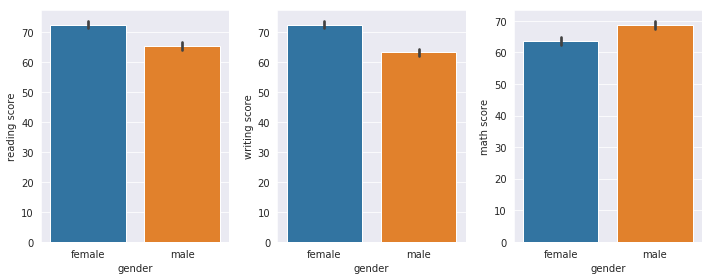

In [29]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.barplot(x = 'gender', y = 'reading score', data = df)

plt.subplot(1,3,2)
sns.barplot(x = 'gender', y = 'writing score', data = df)

plt.subplot(1,3,3)
sns.barplot(x = 'gender', y = 'math score', data = df)

plt.tight_layout()

**Males have higher math score than Females, whereas Females have higher scores in reading and writing than Males**

#### ** 2. Bar plot of Scores on the basis of Race/Ethnicity**

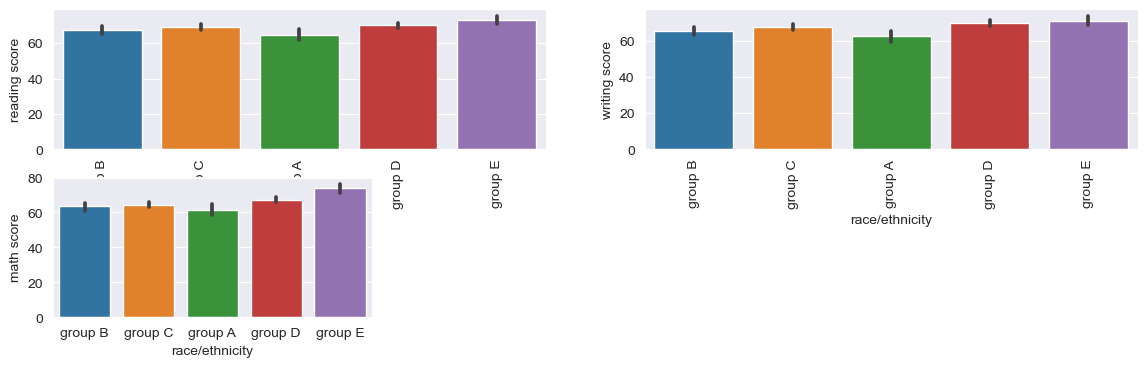

In [57]:
plt.figure(figsize=(14,4))

plt.subplot(2,2,1)
sns.barplot(x = 'race/ethnicity', y = 'reading score', data = df)
plt.xticks(rotation = 90)

plt.subplot(2,2,2)
sns.barplot(x = 'race/ethnicity', y = 'writing score', data = df)
plt.xticks(rotation = 90)

plt.subplot(2,2,3)
sns.barplot(x = 'race/ethnicity', y = 'math score', data = df)
plt.xticks(rotation = 0)

plt.subplot(2,3,4)
sns.barplot(x = 'race/ethnicity', y = 'math score', data = df)
plt.xticks(rotation = 0)
plt.tight_layout()


**People from group E have higher score in all three categories, where as people from group A have the lowest score in all three categories**

#### **3. Bar plots of Scores on the basis of Test Prepration Course**

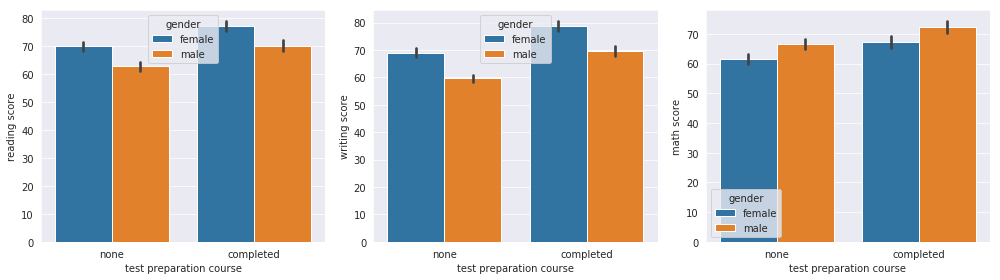

In [31]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'test preparation course', y = 'reading score', hue = 'gender', data = df)

plt.subplot(1,3,2)
sns.barplot(x = 'test preparation course', y = 'writing score',hue = 'gender', data = df)

plt.subplot(1,3,3)
sns.barplot(x = 'test preparation course', y = 'math score',hue = 'gender', data = df)

plt.tight_layout()

**Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course**

#### **4. Bar Plots of Scores on the basis of Parent's Education Level**

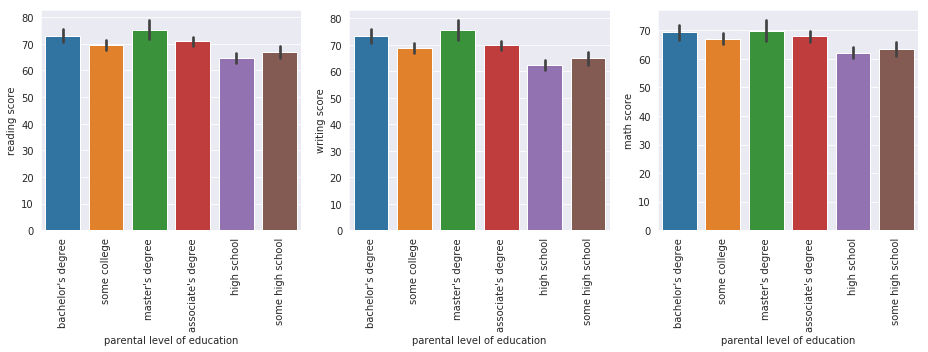

In [32]:
plt.figure(figsize=(13,5))

plt.subplot(1,3,1)
sns.barplot(x = 'parental level of education', y = 'reading score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.barplot(x = 'parental level of education', y = 'writing score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.barplot(x = 'parental level of education', y = 'math score', data = df)
plt.xticks(rotation = 90)

plt.tight_layout()

**Student's whose parents have a Master's degree have scored higher compared to others whereas Student's whose parent's went to high school have obtained low marks compared to others**

#### **5. Bar Plots of Scores on the basis of Types of Luch**

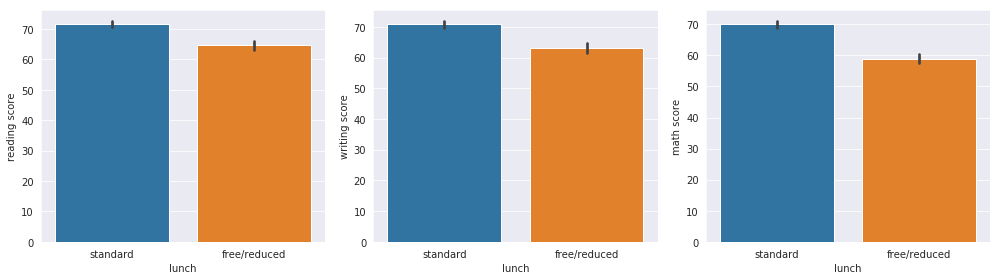

In [33]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.barplot(x = 'lunch', y = 'reading score', data = df)

plt.subplot(1,3,2)
sns.barplot(x = 'lunch', y = 'writing score', data = df)

plt.subplot(1,3,3)
sns.barplot(x = 'lunch', y = 'math score', data = df)


plt.tight_layout()

**Students who availed standard luch have scored higher in all the three categories compared to students who have taken free/ reduced lunch.**

 #### **6. Marks break down according to Gender**

#### **i. Math Score**

In [34]:
print('----Females----')
print('Max. math Score: ', df[df['gender'] == 'female']['math score'].max())
print('Min. math Score: ', df[df['gender'] == 'female']['math score'].min())
print('Average math Score: ', df[df['gender'] == 'female']['math score'].mean())
print('----Males----')
print('Max. math Score: ', df[df['gender'] == 'male']['math score'].max())
print('Min. math Score: ', df[df['gender'] == 'male']['math score'].min())
print('Average math Score: ', df[df['gender'] == 'male']['math score'].mean())

----Females----
Max. math Score:  100
Min. math Score:  0
Average math Score:  63.633204633204635
----Males----
Max. math Score:  100
Min. math Score:  27
Average math Score:  68.72821576763485


#### ** ii. Reading Score**

In [35]:
print('----Females----')
print('Max. reading Score: ', df[df['gender'] == 'female']['reading score'].max())
print('Min. reading Score: ', df[df['gender'] == 'female']['reading score'].min())
print('Average reading Score: ', df[df['gender'] == 'female']['reading score'].mean())
print('----Males----')
print('Max. reading Score: ', df[df['gender'] == 'male']['reading score'].max())
print('Min. reading Score: ', df[df['gender'] == 'male']['reading score'].min())
print('Average reading Score: ', df[df['gender'] == 'male']['reading score'].mean())

----Females----
Max. reading Score:  100
Min. reading Score:  17
Average reading Score:  72.60810810810811
----Males----
Max. reading Score:  100
Min. reading Score:  23
Average reading Score:  65.47302904564316


#### ** iii. Writing Score**

In [36]:
print('----Females----')
print('Max. writing Score: ', df[df['gender'] == 'female']['writing score'].max())
print('Min. writing Score: ', df[df['gender'] == 'female']['writing score'].min())
print('Average writing Score: ', df[df['gender'] == 'female']['writing score'].mean())
print('----Males----')
print('Max. writing Score: ', df[df['gender'] == 'male']['writing score'].max())
print('Min. writing Score: ', df[df['gender'] == 'male']['writing score'].min())
print('Average writing Score: ', df[df['gender'] == 'male']['writing score'].mean())

----Females----
Max. writing Score:  100
Min. writing Score:  10
Average writing Score:  72.46718146718146
----Males----
Max. writing Score:  100
Min. writing Score:  15
Average writing Score:  63.31120331950208


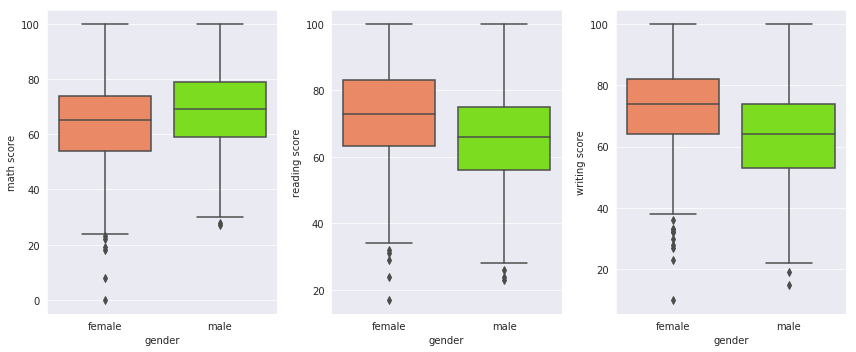

In [37]:
plt.figure(figsize=(12,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'gender', y = 'math score', data = df,palette = ['coral', 'lawngreen'])

plt.subplot(1,3,2)
sns.boxplot(x = 'gender', y = 'reading score', data = df,palette = ['coral', 'lawngreen'])

plt.subplot(1,3,3)
sns.boxplot(x = 'gender', y = 'writing score', data = df,palette = ['coral', 'lawngreen'])

plt.tight_layout()

#### ** 7. Marks breakdown according to Race/Ethnicity**

#### ** i. Math Score**

In [38]:
for i in sorted(df['race/ethnicity'].unique()):
    print('-----',i,'-----')
    print('Max. marks: ', df[df['race/ethnicity'] == i]['math score'].max())
    print('Min. marks: ', df[df['race/ethnicity'] == i]['math score'].min())
    print('Average marks: ', df[df['race/ethnicity'] == i]['math score'].mean())

----- group A -----
Max. marks:  100
Min. marks:  28
Average marks:  61.62921348314607
----- group B -----
Max. marks:  97
Min. marks:  8
Average marks:  63.45263157894737
----- group C -----
Max. marks:  98
Min. marks:  0
Average marks:  64.46394984326018
----- group D -----
Max. marks:  100
Min. marks:  26
Average marks:  67.36259541984732
----- group E -----
Max. marks:  100
Min. marks:  30
Average marks:  73.82142857142857


#### **ii. Reading Score**

In [39]:
for i in sorted(df['race/ethnicity'].unique()):
    print('-----',i,'-----')
    print('Max. marks: ', df[df['race/ethnicity'] == i]['reading score'].max())
    print('Min. marks: ', df[df['race/ethnicity'] == i]['reading score'].min())
    print('Average marks: ', df[df['race/ethnicity'] == i]['reading score'].mean())

----- group A -----
Max. marks:  100
Min. marks:  23
Average marks:  64.67415730337079
----- group B -----
Max. marks:  97
Min. marks:  24
Average marks:  67.35263157894737
----- group C -----
Max. marks:  100
Min. marks:  17
Average marks:  69.10344827586206
----- group D -----
Max. marks:  100
Min. marks:  31
Average marks:  70.03053435114504
----- group E -----
Max. marks:  100
Min. marks:  26
Average marks:  73.02857142857142


#### **iii. Writing Score**

In [40]:
for i in sorted(df['race/ethnicity'].unique()):
    print('-----',i,'-----')
    print('Max. marks: ', df[df['race/ethnicity'] == i]['writing score'].max())
    print('Min. marks: ', df[df['race/ethnicity'] == i]['writing score'].min())
    print('Average marks: ', df[df['race/ethnicity'] == i]['writing score'].mean())

----- group A -----
Max. marks:  97
Min. marks:  19
Average marks:  62.674157303370784
----- group B -----
Max. marks:  96
Min. marks:  15
Average marks:  65.6
----- group C -----
Max. marks:  100
Min. marks:  10
Average marks:  67.82758620689656
----- group D -----
Max. marks:  100
Min. marks:  32
Average marks:  70.14503816793894
----- group E -----
Max. marks:  100
Min. marks:  22
Average marks:  71.40714285714286


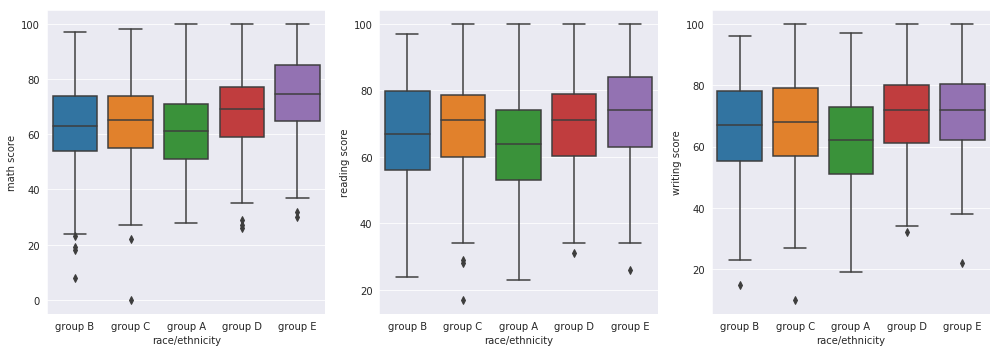

In [41]:
plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.boxplot(x = 'race/ethnicity', y = 'math score', data = df)

plt.subplot(1,3,2)
sns.boxplot(x = 'race/ethnicity', y = 'reading score', data = df)

plt.subplot(1,3,3)
sns.boxplot(x = 'race/ethnicity', y = 'writing score', data = df)

plt.tight_layout()

####  **8. Marks breakdown on the basis of Parent's Education Level**

#### **i. Math Score**

In [42]:
for i in df['parental level of education'].unique():
    print('-----',i,'-----')
    print('Max. marks: ', df[df['parental level of education'] == i]['math score'].max())
    print('Min. marks: ', df[df['parental level of education'] == i]['math score'].min())
    print('Average. marks: ', df[df['parental level of education'] == i]['math score'].mean())
    

----- bachelor's degree -----
Max. marks:  100
Min. marks:  29
Average. marks:  69.38983050847457
----- some college -----
Max. marks:  100
Min. marks:  19
Average. marks:  67.1283185840708
----- master's degree -----
Max. marks:  95
Min. marks:  40
Average. marks:  69.7457627118644
----- associate's degree -----
Max. marks:  100
Min. marks:  26
Average. marks:  67.88288288288288
----- high school -----
Max. marks:  99
Min. marks:  8
Average. marks:  62.13775510204081
----- some high school -----
Max. marks:  97
Min. marks:  0
Average. marks:  63.497206703910614


#### ** ii. Reading Score**


In [43]:
for i in df['parental level of education'].unique():
    print('-----',i,'-----')
    print('Max. marks: ', df[df['parental level of education'] == i]['reading score'].max())
    print('Min. marks: ', df[df['parental level of education'] == i]['reading score'].min())
    print('Average. marks: ', df[df['parental level of education'] == i]['reading score'].mean())
    

----- bachelor's degree -----
Max. marks:  100
Min. marks:  41
Average. marks:  73.0
----- some college -----
Max. marks:  100
Min. marks:  23
Average. marks:  69.46017699115045
----- master's degree -----
Max. marks:  100
Min. marks:  42
Average. marks:  75.37288135593221
----- associate's degree -----
Max. marks:  100
Min. marks:  31
Average. marks:  70.92792792792793
----- high school -----
Max. marks:  99
Min. marks:  24
Average. marks:  64.70408163265306
----- some high school -----
Max. marks:  100
Min. marks:  17
Average. marks:  66.93854748603351


#### ** iii. Writing Score**

In [44]:
for i in df['parental level of education'].unique():
    print('-----',i,'-----')
    print('Max. marks: ', df[df['parental level of education'] == i]['writing score'].max())
    print('Min. marks: ', df[df['parental level of education'] == i]['writing score'].min())
    print('Average. marks: ', df[df['parental level of education'] == i]['writing score'].mean())
    

----- bachelor's degree -----
Max. marks:  100
Min. marks:  38
Average. marks:  73.38135593220339
----- some college -----
Max. marks:  99
Min. marks:  19
Average. marks:  68.84070796460178
----- master's degree -----
Max. marks:  100
Min. marks:  46
Average. marks:  75.67796610169492
----- associate's degree -----
Max. marks:  100
Min. marks:  35
Average. marks:  69.8963963963964
----- high school -----
Max. marks:  100
Min. marks:  15
Average. marks:  62.44897959183673
----- some high school -----
Max. marks:  100
Min. marks:  10
Average. marks:  64.88826815642459


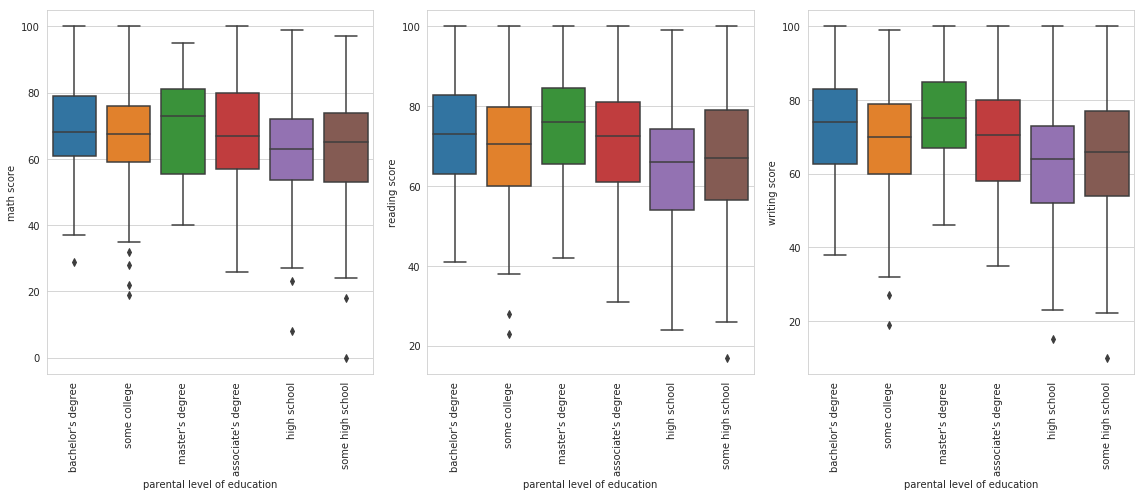

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,7))
plt.subplot(1,3,1)
sns.boxplot(x ='parental level of education' , y = 'math score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,2)
sns.boxplot(x ='parental level of education' , y = 'reading score', data = df)
plt.xticks(rotation = 90)

plt.subplot(1,3,3)
sns.boxplot(x ='parental level of education' , y = 'writing score', data = df)
plt.xticks(rotation = 90)

plt.tight_layout()

### **Implementing a Grading system for marks obtained**

**The grading system is described as follows:**

**1. O (Outstanding)**: Student who scores 91 marks or higher in a subject<br>
**2. A+ (Excellent)**: Student who scores 82 marks or higher in a subject<br>
**3. A (Very Good)**: Student who scores 73 marks or higher in a subject<br>
**4. B+ (Good)**: Student who scores 64 marks or higher in a subject<br>
**5. B (Above Average)**: Student who scores 55 marks or higher in a subject<br>
**6. C (Average)**: Student who scores 46 marks or higher in a subject<br>
**7. P (Pass)**: Student who scores 35 marks or higher in a subject<br>
**8. F (Fail)**: Student who scores less than 35 marks in a subject<br>


In [46]:
# Function to assign grades

def get_grade(marks):
    if marks >= 91:
        return 'O'
    elif marks >= 82 and marks < 91:
        return 'A+'
    elif marks >=73 and marks < 82:
        return 'A'
    elif marks >=64 and marks < 73:
        return 'B+'
    elif marks >= 55 and marks < 64:
        return 'B'
    elif marks >=46 and marks < 55:
        return 'C'
    elif marks >= 35 and marks < 46:
        return 'P'
    elif marks < 35:
        return 'F'

In [47]:
df['reading_grade'] = df['reading score'].apply(get_grade)
df['writing_grade'] = df['writing score'].apply(get_grade)
df['math_grade'] = df['math score'].apply(get_grade)

#### **Plotting Grade Statistics**

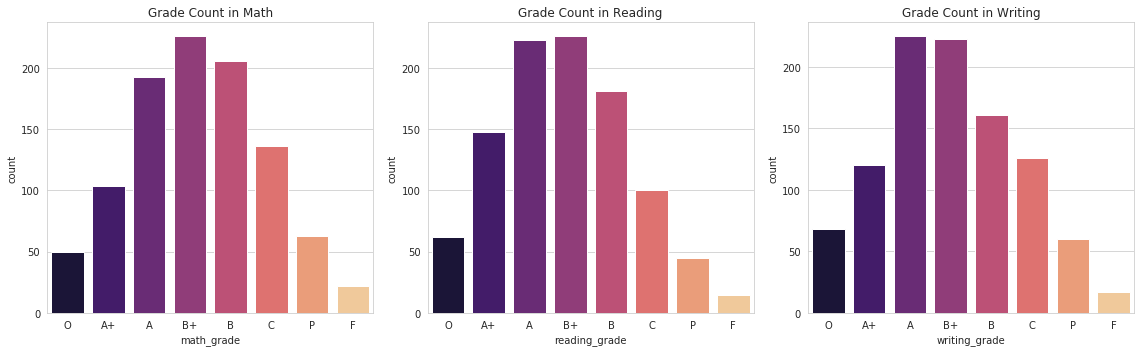

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
plt.subplot(1,3,1)
sns.countplot(x ='math_grade', data = df,order = ['O','A+','A','B+','B','C','P','F'],palette='magma')
plt.title('Grade Count in Math')


plt.subplot(1,3,2)
sns.countplot(x ='reading_grade', data = df,order = ['O','A+','A','B+','B','C','P','F'],palette='magma')
plt.title('Grade Count in Reading')

plt.subplot(1,3,3)
sns.countplot(x ='writing_grade', data = df,order = ['O','A+','A','B+','B','C','P','F'],palette='magma')
plt.title('Grade Count in Writing')

plt.tight_layout()

**Plot Summary**

In [49]:
print('-------- GRADE STATISTICS --------')
print('==== MATH GRADE ====')
print(df['math_grade'].value_counts())
print('==== READING GRADE ====')
print(df['reading_grade'].value_counts())
print('==== WRITING GRADE ====')
print(df['writing_grade'].value_counts())

-------- GRADE STATISTICS --------
==== MATH GRADE ====
B+    226
B     206
A     193
C     136
A+    104
P      63
O      50
F      22
Name: math_grade, dtype: int64
==== READING GRADE ====
B+    226
A     223
B     181
A+    148
C     100
O      62
P      45
F      15
Name: reading_grade, dtype: int64
==== WRITING GRADE ====
A     225
B+    223
B     161
C     126
A+    120
O      68
P      60
F      17
Name: writing_grade, dtype: int64


Most of the students have got a B+ in Maths and Reading Section whereas in Writing Section almost equal number of students have got A and B+ grade.<br>
The number of candidates who just got a qualifying grade(P) and passed is the highest in maths.

#### **Number of students having maximum grade in Maths**

In [50]:
print('No. of students having maximum grade in math: ', len(df[df['math_grade'] == 'O']))

No. of students having maximum grade in math:  50


#### **Number of students having maximum grade in Reading**

In [51]:
print('No. of students having maximum grade in reading: ', len(df[df['reading_grade'] == 'O']))

No. of students having maximum grade in reading:  62


#### **Number of students having maximum grade in Writing**

In [52]:
print('No. of students having maximum grade in writing: ', len(df[df['writing_grade'] == 'O']))

No. of students having maximum grade in writing:  68


#### **Number of students having maximum grade in all three categories**

In [53]:
perfect_writing = df['writing_grade'] == 'O'
perfect_reading = df['reading_grade'] == 'O'
perfect_math = df['math_grade'] == 'O'

perfect_grade = df[(perfect_math) & (perfect_reading) & (perfect_writing)]
print('Number of students having maximum grade(O) in all three subjects: ',len(perfect_grade))

Number of students having maximum grade(O) in all three subjects:  23


#### **Number of students having minimum grade in all three categories**

In [54]:
minimum_math = df['math_grade'] == 'F'
minimum_reading = df['reading_grade'] == 'F'
minimum_writing = df['writing_grade'] == 'F'



minimum_grade = df[(minimum_math) & (minimum_reading) & (minimum_writing)]
print('Number of students having minimum grade(F) in all three subjects: ',len(minimum_grade))

Number of students having minimum grade(F) in all three subjects:  8


### **Classifying Students as Passed or Failed**
A student is classified failed if he/she has failed in any one of three subjects otherwise he/she is classified as passed.

In [55]:
#Failed Students
failed_students = df[(minimum_math) | (minimum_reading)|(minimum_writing)]
failed = len(failed_students)
print('Total Number of students who failed are: {}' .format(len(failed_students)))

Total Number of students who failed are: 29


In [56]:
#Passed Students
passed_students = len(df) - len(failed_students)
print('Total Number of students who passed are: {}' .format(passed_students))

Total Number of students who passed are: 971


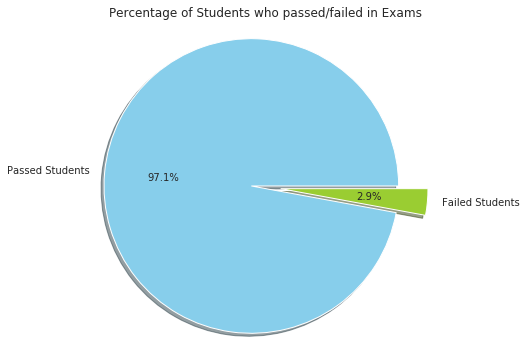

In [57]:
plt.figure(figsize=(8,6))

#Data to plot
labels = 'Passed Students', 'Failed Students'
sizes = [passed_students,failed]
colors = ['skyblue','yellowgreen']
explode = (.2,0)

#Plot
plt.pie(sizes,explode = explode, labels = labels,colors = colors,
       autopct='%1.1f%%',shadow = True, startangle=360)
plt.axis('equal')
plt.title('Percentage of Students who passed/failed in Exams')
plt.show()

Majority(97.1%) of students passed in all the three subjects.Only 2.9% students failed in atleast one of the three subjects

**Suggestions are welcome**